<a href="https://colab.research.google.com/github/nailafhidayat/TI03_Naila-Fitriani-Hidayat_0110223086/blob/main/DATA_MINING_%5BPraktikum_Mandiri_3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Dataset/retail_sales.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,NaN,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,NaN,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,NaN,62,NaN,1,50,50
996,997,2023-11-17,CUST997,NaN,52,NaN,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# **Membaca dan Menampilkan Informasi Umum Dataset.**

In [29]:
# Melihat 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(df.head())

5 Baris Pertama dari Dataset:
   Quantity  Price per Unit  Total Amount
0       1.0        0.042553      0.123711
1       0.5        1.000000      1.000000
2       0.0        0.000000      0.000000
3       0.0        1.000000      0.484536
4       0.5        0.042553      0.072165


In [30]:
# Menampilkan informasi umum tentang dataset
print("\nInformasi Umum tentang Dataset:")
print(df.info())


Informasi Umum tentang Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        5 non-null      float64
 1   Price per Unit  5 non-null      float64
 2   Total Amount    5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes
None


# **Explorasi Data : Min, max, dan rata-rata.**

In [31]:
# Menampilkan statistik deskriptif dari data kuantitatif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       Quantity  Price per Unit  Total Amount
count   5.00000        5.000000      5.000000
mean    0.40000        0.417021      0.336082
std     0.41833        0.532468      0.415491
min     0.00000        0.000000      0.000000
25%     0.00000        0.042553      0.072165
50%     0.50000        0.042553      0.123711
75%     0.50000        1.000000      0.484536
max     1.00000        1.000000      1.000000


In [33]:
# Menghitung nilai minimum, maksimum, dan rata-rata untuk kolom kuantitatif
print("\nNilai Minimum, Maximum, dan Rata-rata:")
min_values = df[['Quantity', 'Price per Unit', 'Total Amount']].min()
max_values = df[['Quantity', 'Price per Unit', 'Total Amount']].max()
mean_values = df[['Quantity', 'Price per Unit', 'Total Amount']].mean()

# Menggabungkan hasil ke dalam DataFrame
summary_df = pd.DataFrame({
    'Minimum': min_values,
    'Maximum': max_values,
    'Mean': mean_values
})

print(summary_df)


Nilai Minimum, Maximum, dan Rata-rata:
                Minimum  Maximum      Mean
Quantity            0.0      1.0  0.400000
Price per Unit      0.0      1.0  0.417021
Total Amount        0.0      1.0  0.336082


# **Data Cleaning**

In [16]:
# Memeriksa jumlah missing values per kolom
print(df.isnull().sum())

Transaction ID        0
Date                  0
Customer ID           0
Gender              191
Age                   0
Product Category    184
Quantity              0
Price per Unit        0
Total Amount          0
dtype: int64


In [17]:
# Menghapus baris yang memiliki missing values
df_cleaned = df.dropna()

In [18]:
# Menjadikan Transaction ID sebagai index agar memudahkan mengambil sebuah data
df.set_index('Transaction ID', inplace=True)
df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,NaN,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,NaN,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,NaN,62,NaN,1,50,50
997,2023-11-17,CUST997,NaN,52,NaN,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


# **Visualisasi Data**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style untuk seaborn
sns.set(style='whitegrid')

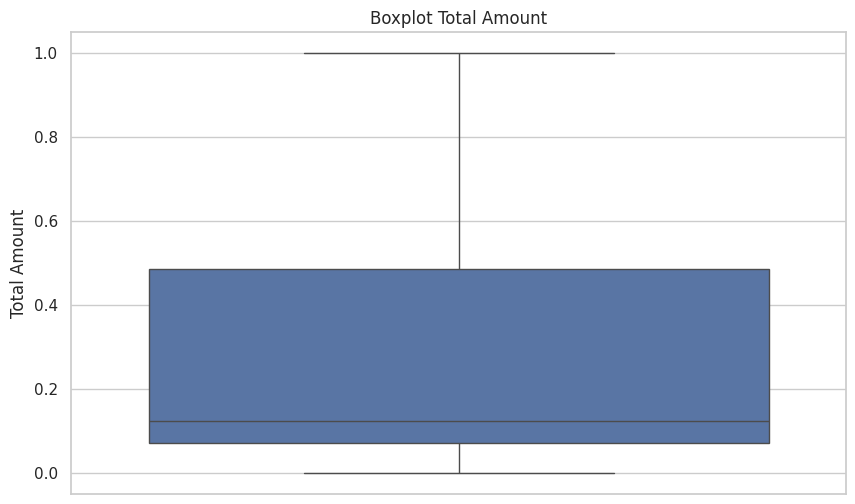

In [36]:
# Visualisasi 1: Boxplot untuk Total Amount
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Total Amount'])
plt.title('Boxplot Total Amount')
plt.ylabel('Total Amount')
plt.show()

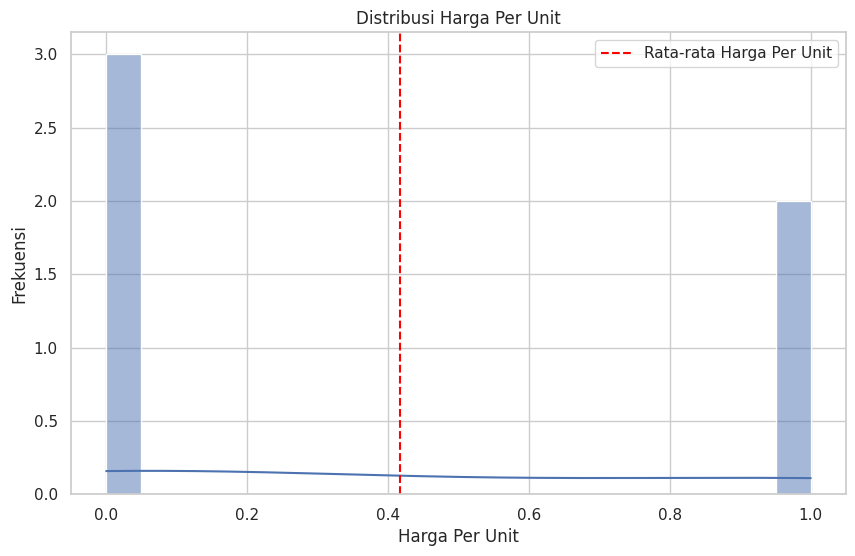

In [45]:
# Visualisasi 2: Histogram untuk Distribusi Price Per Unit
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], bins=20, kde=True)
plt.title('Distribusi Harga Per Unit')
plt.xlabel('Harga Per Unit')
plt.ylabel('Frekuensi')
plt.axvline(df['Price per Unit'].mean(), color='red', linestyle='--', label='Rata-rata Harga Per Unit')
plt.legend()
plt.show()

# **Normalization : min-max, z-score, scaling.**

In [20]:
!pip install scikit-learn

In [24]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Misalkan ini adalah data asli
data = {
    'Quantity': [3, 2, 1, 1, 2],
    'Price per Unit': [50.0, 500.0, 30.0, 500.0, 50.0],
    'Total Amount': [150.0, 1000.0, 30.0, 500.0, 100.0]
}

# Membuat DataFrame dari data asli
df_original = pd.DataFrame(data)

# Inisialisasi MinMaxScaler
min_max_scaler = MinMaxScaler()

# Min-Max Normalization
df_minmax = df_original.copy()
df_minmax[['Quantity', 'Price per Unit', 'Total Amount']] = min_max_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# Menampilkan hasil Min-Max Normalization
print("Min-Max Normalization:")
print(df_minmax)

Min-Max Normalization:
   Quantity  Price per Unit  Total Amount
0       1.0        0.042553      0.123711
1       0.5        1.000000      1.000000
2       0.0        0.000000      0.000000
3       0.0        1.000000      0.484536
4       0.5        0.042553      0.072165


In [25]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
zscore_scaler = StandardScaler()

# Z-Score Normalization
df_zscore = df_original.copy()
df_zscore[['Quantity', 'Price per Unit', 'Total Amount']] = zscore_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# Menampilkan hasil Z-Score Normalization
print("\nZ-Score Normalization:")
print(df_zscore)


Z-Score Normalization:
   Quantity  Price per Unit  Total Amount
0  1.603567       -0.786279     -0.571464
1  0.267261        1.224093      1.786519
2 -1.069045       -0.875628     -0.904356
3 -1.069045        1.224093      0.399470
4  0.267261       -0.786279     -0.710169


In [26]:
from sklearn.preprocessing import MaxAbsScaler

# Inisialisasi MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Max Absolute Scaling
df_maxabs = df_original.copy()
df_maxabs[['Quantity', 'Price per Unit', 'Total Amount']] = max_abs_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# Menampilkan hasil Max Absolute Scaling
print("\nMax Absolute Scaling:")
print(df_maxabs)


Max Absolute Scaling:
   Quantity  Price per Unit  Total Amount
0  1.000000            0.10          0.15
1  0.666667            1.00          1.00
2  0.333333            0.06          0.03
3  0.333333            1.00          0.50
4  0.666667            0.10          0.10


In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
import pandas as pd

# Misalkan ini adalah data asli
data = {
    'Quantity': [3, 2, 1, 1, 2],
    'Price per Unit': [50.0, 500.0, 30.0, 500.0, 50.0],
    'Total Amount': [150.0, 1000.0, 30.0, 500.0, 100.0]
}

# Membuat DataFrame dari data asli
df_original = pd.DataFrame(data)

# 1. Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_minmax = df_original.copy()
df_minmax[['Quantity', 'Price per Unit', 'Total Amount']] = min_max_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# 2. Z-Score Normalization
zscore_scaler = StandardScaler()
df_zscore = df_original.copy()
df_zscore[['Quantity', 'Price per Unit', 'Total Amount']] = zscore_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# 3. Max Absolute Scaling
max_abs_scaler = MaxAbsScaler()
df_maxabs = df_original.copy()
df_maxabs[['Quantity', 'Price per Unit', 'Total Amount']] = max_abs_scaler.fit_transform(df_original[['Quantity', 'Price per Unit', 'Total Amount']])

# Menyusun hasil semua normalisasi berdampingan
df_comparison = pd.concat([df_original,
                           df_minmax[['Quantity', 'Price per Unit', 'Total Amount']],
                           df_zscore[['Quantity', 'Price per Unit', 'Total Amount']],
                           df_maxabs[['Quantity', 'Price per Unit', 'Total Amount']]],
                          axis=1)

# Mengganti nama kolom agar mudah dibaca
df_comparison.columns = ['Quantity (Original)', 'Price per Unit (Original)', 'Total Amount (Original)',
                         'Quantity (Min-Max)', 'Price per Unit (Min-Max)', 'Total Amount (Min-Max)',
                         'Quantity (Z-Score)', 'Price per Unit (Z-Score)', 'Total Amount (Z-Score)',
                         'Quantity (MaxAbs)', 'Price per Unit (MaxAbs)', 'Total Amount (MaxAbs)']

# Menampilkan hasil perbandingan dalam tabel yang rapi
import numpy as np
from tabulate import tabulate

# Mengubah DataFrame menjadi array untuk tabulate
comparison_array = df_comparison.to_numpy()

# Mencetak tabel dengan tabulate
print(tabulate(comparison_array, headers=df_comparison.columns, tablefmt='pretty'))

+---------------------+---------------------------+-------------------------+--------------------+--------------------------+------------------------+---------------------+--------------------------+------------------------+--------------------+-------------------------+-----------------------+
| Quantity (Original) | Price per Unit (Original) | Total Amount (Original) | Quantity (Min-Max) | Price per Unit (Min-Max) | Total Amount (Min-Max) | Quantity (Z-Score)  | Price per Unit (Z-Score) | Total Amount (Z-Score) | Quantity (MaxAbs)  | Price per Unit (MaxAbs) | Total Amount (MaxAbs) |
+---------------------+---------------------------+-------------------------+--------------------+--------------------------+------------------------+---------------------+--------------------------+------------------------+--------------------+-------------------------+-----------------------+
|         3.0         |           50.0            |          150.0          |        1.0         |   0.042553191

In [50]:
# Menyimpan dataset yang sudah diproses ke file baru
df_cleaned.to_csv('retail_sales_cleaned.csv', index=False)